# Estatística & Probabilidade - 2022/02

## Projeto 02 - Uma introdução ao aprendizado de máquina

### Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

#### Google Classroom: `uuc2d5e`

# -- INSTRUÇÕES -- LEIAM ATENTAMENTE! --

* A data limite de entrega da avaliação é sábado 06/01/2023 às 23h59. Avaliações entregues após esse prazo serão desconsideradas.

* A entrega deve ser feita exclusivamente através do Google Classroom, e o projeto deve ser redigido na forma de um relatório incluindo os códigos. Para isso, use a linguagem Python dentro de um notebook do Google Colaboratory, a ser anexado na atividade da seguinte forma:
  - Dentro da turma no Google Classroom, clique em ``Atividades"
            
  - No tema "Projetos", clique em "Projeto 02" e em seguida em "Ver atividade"
            
  - No canto superior direito, clique em "+ Adicionar ou criar" e em seguida selecione em "Arquivo" ou "Google Drive", se optar fazer upload do notebook ou selecionar um arquivo de seu Google Drive, respectivamente.
            
  - O título do notebook deverá ser, obrigatoriamente, "SEU NOME - Projeto 02".
            
  - Para entregar o projeto, abra a atividade que o contém (conforme procedimento explicado no ponto acima), e no canto superior direito clique em "ENTREGAR" (o texto estará em uma caixa cinza, mas ele é clicável).
            
  - Na tela a seguir clique em "Entregar" para confirmar a entrega do trabalho.
            
  - Se você se arrependeu e quiser fazer outra entrega, basta abrir a atividade, no canto superior direito clique em "Cancelar envio" e confirme clicando novamente em "Cancelar envio" na janela que irá abrir. Você pode fazer isso quantas vezes quiser até o prazo determinado.
            
  - As explicações que você precisará fazer devem ser feitas em células de texto em seu notebook. Somente comentários pequenos devem ser feitos no código.
            
  - Caso seja necessário, equações podem ser introduzidas em $\LaTeX$ nas células de texto.
            
  - Figuras também podem ser incluídas em células de texto, tanto através de upload quanto simplesmente arrastando-a para alguma célula de texto. Nesse caso, sempre informe a fonte de onde a figura foi retirada.

* A troca de conhecimento na realização da avaliação é permitida e encorajada: ciência se faz com colaboração, e devemos seguir esse espírito aqui. Porém, cada aluno deverá ter a sua própria resolução, e cópias ou outras ilegalidades serão severamente punidas com a anulação da avaliação para o(s) aluno(s) suspeito(s).

* Todos os passos de sua resolução devem ser devidamente justificados.

* Ao entregar essa avaliação, você afirma ter lido e estar de acordo com essas regras, comprometendo-se a cumpri-las.

O objetivo desta atividade é lhes introduzir a alguns aspectos de aprendizagem de máquina, tanto teóricos quanto práticos. Primeiramente, vamos introduzir um pouco de teoria e terminologia.

# Introdução

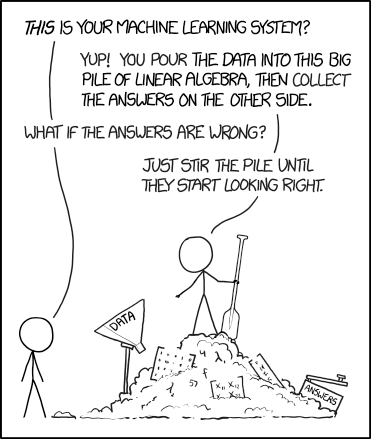

Retirado de https://xkcd.com/1838/

* **Estatística**: "Disciplina que trata da coleta, organização, análise, interpretação e apresentação de dados". [Fonte: Wikipedia]

* **Aprendizado estatístico/*Machine Learning***: Conjunto de ferramentas e modelos para entender dados, com especial atenção a aspectos de eficiência computacional. [Fonte: Wikipedia + vozes da minha cabeça]

* Métodos tradicionais de Estatística não são mais capazes de lidar com volumes de dados disponíveis atualmente

* Dados complexos: um bom entendimento sobre a aplicação não é somente importante mas crucial, em particular, para a elaboração de novas metodologias

* Em particular, metodologias e algoritmos podem ser fortemente dependentes da aplicação

Mudança de paradigma

* Estatística do Séc. XX:
   - Resultados assintóticos
   - $n \gg p$, onde $n$ é o número de observações e $p$ é o número de covariáveis

- Aplicações modernas:
   * $p \approx n$ ou $p \gg n$ -- ou seja, potencialmente mais coisas para se estimar do que se observa!
   * Resultados assintóticos não se aplicam mais

Duas culturas:
- Modelagem dos dados: criação e validação de um modelo para os dados observados. Foco em inferência
- Modelagem algorítmica: criação de bons algoritmos para prever novas instâncias observadas. Muitas vezes não lança mão de modelo probabilístico algum para os dados

$\Rightarrow$ "Nem melhor nem pior, apenas diferentes!"

Duas grandes áreas:

- Aprendizado supervisionado: modelos para aprender uma relação entre uma entrada e uma saída com base em um conjunto de exemplos ◄
- Aprendizado não-supervisionado: algoritmos que aprendem padrões e estruturas subjacentes em dados não-anotados

Dois principais tipos de problemas:

- Regressão: variável de saída é quantitativa
- Classificação: variável de saída é categórica ◄

## Classificação supervisionada sob a ótica da modelagem dos dados

- $\mathbf{X}$ vetor aleatório em $\mathbb{R}^p$ - *preditores* ou *atributos* (*features*)
- $\mathcal{C}$ conjunto finito - *rótulos*
- $Y$ variável aleatória em $\mathcal{C}$ finito

- Distribuição de probabilidade conjunta para $(\mathbf{X}, Y)$
- Observações $(\mathbf{X}_1, Y_1), \dots, (\mathbf{X}_n, Y_n), \dots \sim (\mathbf{X}, Y)$ iid
- Problema de **predição**: A partir de observações $(\mathbf{x}_i, y_i)_{i = 1, \dots, n}$ encontrar $g: \mathbb{R}^p \to \mathcal{C}$ (dito o *classificador*) tal que $$``g(\mathbf{x}_{n + 1}) \approx y_{n + 1}, \dots, g(\mathbf{x}_{n + m}) \approx y_{n + m}"$$

- Como formular tal pergunta sem aspas?
- Como encontrar tal $g$?

- *Risco esperado* associado à $g$: $$R(g) = \mathbb{E}[\underbrace{(Y - g(\mathbf{X}))^2}_{L(g; (\mathbf{X}, Y))}]$$
- "Basta" encontrar $g$ que minimiza tal quantidade! :-)

Mas nem tudo são flores...
- Tal procedimento é impossível... requer conhecimento completo do modelo probabilístico que relaciona $\mathbf{X}$ com $Y$!
- Além disso, a *perda quadrática* $L(g; (\mathbf{X}, Y)) = (Y - g(\mathbf{X}))^2$ não faz sentido no problema de classificação!

$$``g(\mathbf{x}_{i}) \approx y_{i}"$$

$$g(\mathbf{x}_{i}) = y_{i} \implies \text{:-)} \\ g(\mathbf{x}_{i}) \neq y_{i} \implies \text{:-(}$$

Uma função perda razoável parece ser $$L(g; (\mathbf{X}, Y)) = \mathbb{I}(Y \neq g(\mathbf{X})) = \begin{cases} 0, &\text{ se } Y = g(\mathbf{X}) \\ 1, &\text{ se } Y \neq g(\mathbf{X}) \end{cases}$$

Sua respectiva função risco é dada por $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X}))$$

Qual classificador $g$ minimiza tal probabilidade?

### O classificador de Bayes

*Teorema*: A função $g: \mathbb{R}^p \to \mathcal{C}$ que minimiza o risco $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X}))$$ é o *classificador de Bayes*, dado por $$g(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$$


- Classificamos $\mathbf{x}$ com a classe que possui a maior probabilidade *a posteriori*
- Porém, $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ é em geral desconhecida

- Estimar $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ para cada classe $d \in \mathcal{C}$
- Considerar o classificador $$\widetilde{g}(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \widehat{\mathbb{P}}(Y = d | \mathbf{X} = \mathbf{x})$$

### Classificador de Bayes ingênuo

#### Formulação matemática

- $\mathbf{X} \in \mathbb{R}^p$ vetor de atributos - vetor aleatório contínuo ou discreto
- Se $\mathbf{X}$ é contínuo com densidade $q(\mathbf{x})$, temos que: $$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{x} | Y = c)\mathbb{P}(Y = c)} ~~~~ \mathrm{[\textit{Bayes...}]}$$
- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes
- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{x} | Y = d)$
- $\mathrm{[\textit{...ingênuo}]}$ Para toda classe $d \in \mathcal{C}$, fatoramos $$q(\mathbf{x} | Y = d) = q(x_1, \dots, x_p | Y = d) = \prod_{j = 1}^{p} q(x_j | Y = d)$$
- *Condicionalmente à classe* $Y$, as componentes de $\mathbf{X}$ são independentes


### Classificador de Bayes ingênuo gaussiano

- $p$ atributos
- $n$ observações de cada


- Dados observados: $X$ matriz $n \times p$
- Cada linha: uma realização do vetor aleatório **contínuo** $\mathbf{X} \in \mathbb{R}^{p}$

- Variável resposta $Y \in \mathcal{C}$ - $n$ observações

- Como $\mathbf{X}$ é contínuo, temos que:


$$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)$$

- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes

- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{X} = \mathbf{x} | Y = d)$, para $d \in \mathcal{C}$

- Hipótese ingênua: *condicionado à classe, as componentes de $\mathbf{X}$ são independentes*

- Matematicamente: *para toda classe $d \in \mathcal{C}$, fatoramos* $$q(\mathbf{X} = \mathbf{x} | Y = d) = q(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} q(X_j = x_j | Y = d)$$


- $X_j | Y = d \sim \text{N}(\mu_{dj}, \sigma_{dj}^2)$

# O projeto

O objetivo do projeto é trabalhar com a base de dados MNIST ("*Modified National Institute of Standards and Technology*"). Tal base consiste de 70.000 imagens de tamanho 28 x 28, em tons de cinza, contendo dígitos manuscritos, e o principal objetivo com ela é identificar qual é o dígito em questão. Algoritmos extremamente sofisticados (e pesadíssimos!) chegam a atingir uma taxa de erro de 0,17%, mas aqui vamos trabalhar com um algoritmo bem mais simples, o classificador de Bayes ingênuo Gaussiano, introduzido acima. Para tal, vamos usar o pacote `scikit-learn` (https://scikit-learn.org/stable/), que implementa diversos algoritmos de aprendizado de máquina de forma muito eficiente e de fácil uso. Abaixo seguem alguns códigos para melhor guiá-los, e no meio há instruções para o que deve ser feito no projeto.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## A base de dados

Primeiramente, vamos carregar e fazer uma análise preliminar na base de dados.

In [ ]:
# Baixando a base de dados

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)

In [ ]:
# Vendo o cabeçalho referente à X, bem como seu tamanho

print(X.shape)
X.head()

In [ ]:
# Vendo o cabeçalho referente à y, bem como seu tamanho

print(y.shape)
y.head()

Como podemos ver acima, `X` é um *dataframe* de 70.000 linhas e 784 colunas, e `y` é um *array* de tamanho 70.000, contendo o número referente a cada linha de `X`. Portanto, cada linha de `X` representa uma imagem de um dígito manuscrito. Vejamos alguns exemplos:

In [ ]:
# FONTE: https://www.kaggle.com/code/soham1024/basic-neural-network-from-scratch-in-python

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(12, 12))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0].reshape(28, 28)        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

random_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    random_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))

show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

Acima, nós vimos como são algumas das linhas de `X` pensadas como uma imagem de tamanho 28 x 28. Agora, vamos estudar a sua estrutura como um vetor de tamanho 784.

In [ ]:
r = np.random.randint(1, 70000)
plt.hist(X.values[r])
print('Dígito:', y[r])
plt.show()

Portanto, do ponto de vista estatístico, cada linha do *dataframe* `X` consiste de 784 observações de variáveis aleatórias que tomam seus valores entre 0 e 255 e concentram-se principalmente em torno de tais valores. Essa é exatamente a estrutura de uma imagem em tons de cinza: o valor igual a 0 representa um *pixel* totalmente preto e um valor igual a 255 representa um *pixel* totalmente branco. Recomendo rodar diversas vezes o bloco acima, para verificar como varia o histograma dos tons de cinza. Nosso objetivo será tentar identificar qual dígito está sendo representado por determinado vetor de tamanho 784 (cujas componentes chamaremos de *atributos*), utilizando o classificador de Bayes ingênuo gaussiano que discutimos acima.

**QUESTÃO 1:** O classificador de Bayes ingênuo Gaussiano tem duas hipóteses: condicionado na classe, os atributos são (1) independentes e (2) descritos por distribuições normais (com parâmetros desconhecidos). "Traduza" o que isso significa na linguagem do problema em questão (quais são nossos atributos? nossas classes? etc...), e discorra sobre a razoabilidade de tais hipóteses em nosso cenário.

*BÔNUS*: Apresente uma análise exploratória para justificar as suas conclusões.

-- sua resposta aqui --

Para melhorar a magnitude de nossos dados, iremos fazer uma espécie de normalização, dividindo todos os valores de `X` por 255, para que tenhamos sempre valores entre 0 e 1.

In [ ]:
# ATENÇÃO! Se você rodar essa célula mais de uma vez, vai estar "comprimindo" ainda mais os valores de X! Recomendo não fazer isso para evitar erros numéricos.

X = X/255

## Classificando a base

Uma prática em aprendizagem de máquina é dividir nossa base de dados em duas partes: um *conjunto de treinamento* e um *conjunto de teste*. O primeiro será usado para estimarmos os parâmetros que o classificador precisará, e o segundo será usado para medir a sua performance. O `scikit-learn` tem ferramentas que fazem essa separação de modo automático. Abaixo, deixamos 60.000 observações para treinamento e 10.000 para teste. Para garantir igual representatividade das classes em ambos os conjuntos fazemos uma *amostragem estratificada*, através do parâmetro `stratify = y`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, shuffle = True, stratify = y)

**QUESTÃO 2:** A classe que vamos usar para fazer o nosso procedimento é a `GaussianNB`, localizada dentro do módulo `naive_bayes`. A documentação do `scikit-learn` é bastante informativa, e particularmente me ajuda bastante a entender os algoritmos lá implementados. Portanto, leiam a documentação referente ao `GaussianNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), e a página direcionada através do *link* "User Guide", onde encontra-se a formulação matemática por trás do método em questão. Após essa leitura, façam uma comparação do que lá é dito com o que foi apresentado acima sobre o método de classificação proposto, elencando pontos onde há semelhanças e divergências. Em particular, descreva o que os métodos `fit`, `predict` e `predict_proba` fazem.

-- sua resposta aqui --

**QUESTÃO 3:** Agora é a sua vez de trabalhar sobre a base de dados que apresentamos! Use o `GaussianNB` para treinar um modelo de Bayes ingênuo gaussiano nos conjuntos `X_train` e `y_train`, e prever os resultados no conjunto `X_test`. Agora, com um exemplo concreto em mãos, revisite o que os métodos  `predict` e `predict_proba` fazem. Uma dica é olhar os exemplos na documentação do `scikit-learn`.

-- sua resposta aqui --

**QUESTÃO 4:** Nós temos um conjunto de dados relativamente grande, com 60.000 observações. Para ajustar um classificador de Bayes ingênuo gaussiano, quantos parâmetros nós precisamos estimar? Compare esse número com o tamanho do conjunto de treinamento, e diga o que você pode esperar da qualidade de tais estimativas pontuais.

-- sua resposta aqui --

**QUESTÃO 5:** Bom, agora nós temos um classificador e temos como prever o resultado da classificação no nosso conjunto de teste. Mas como podemos *medir* o desempenho de nosso classificador? Estude sobre a *matriz de confusão* e sobre a *acurácia* de um classificador, e disserte sobre essas duas quantidades. Relacione a quantidade retornada pelo método `score` com a acurácia que você acabou de estudar.

Recomendação:
* https://en.wikipedia.org/wiki/Confusion_matrix [A matriz de confusão aqui será referente a um problema de classificação *binário*, enquanto que estamos tratando de um problema de classificação *multiclasse*. Tome cuidado com essa diferença]
* https://en.wikipedia.org/wiki/Accuracy_and_precision

*BÔNUS:* Porque acima nós falamos somente sobre aferir a qualidade do classificador no conjunto de teste e não no de treinamento? Discuta sobre esse ponto.

**QUESTÃO 6:** Use o código dado abaixo para exibir a matriz de confusão, bem como uma representação gráfica mais amigável dela. Analise os erros cometidos pelo classificador e tente justificá-los, com base nas hipóteses do classificador e da natureza da base de dados. Calcule também a acurácia do classificador estimado. À luz dessas duas informações, extraia alguma conclusão sobre o classificador ser "bom" ou "ruim", em seu ponto de vista. Note que sua ponderação deve levar em consideração também o custo computacional de nosso classificador! Use como um "pior classificador possível" aquele que atribui uma observação a qualquer um dos dígitos de 0 até 9, aleatoriamente.

In [ ]:
# A variável y_test_pred abaixo deverá ser a previsão do seu classificador no conjunto de teste, ou seja, em X_test.

labels = y.cat.categories
cm = confusion_matrix(y_test, y_test_pred, labels=labels)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.show()

**QUESTÃO 7:** Finalmente, após ter realizado todos esses experimentos, descreva quais hipóteses poderiam ser aprimoradas em nosso classificador, para que ele seja mais condizente com a base de dados e, portanto, possivelmente apresente um resultado melhor.

Note que não há como atingir 100% de acurácia neste problema. Veja abaixo algumas instâncias especialmente complicadas, e possivelmente rotuladas erroneamente:

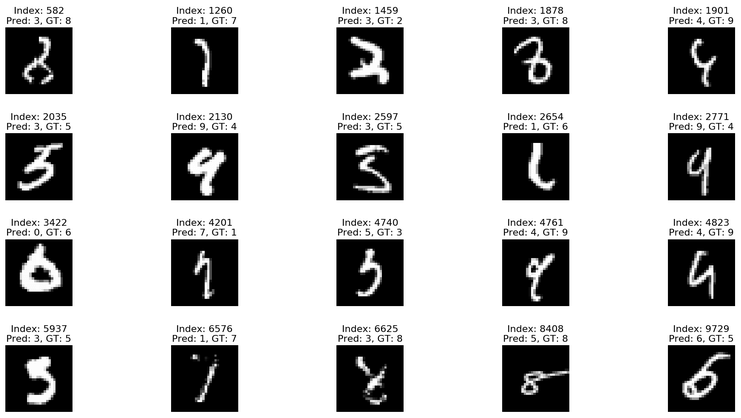